In [79]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "house_prices_regression_model"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [80]:
#https://www.kaggle.com/c/5407/download-all

## Get/Load the data

In [81]:
import pandas as pd

#specify housing data folder name within project directory
housing_data_folder_path = os.path.join(PROJECT_ROOT_DIR, "data_source")

def load_housing_data(housing_filename):
    csv_path = os.path.join(housing_data_folder_path, housing_filename)
    return pd.read_csv(csv_path)

In [82]:
housing = load_housing_data(housing_filename = "train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Data exploration

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [84]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [85]:
#What % of missing values within features?

def calculate_missing_value_percentage(df):
    col = [str(col) for col in df.columns]
    percent_missing_values = [round((df[col].isnull().sum())/(len(df[col]))*100) for col in df.columns]
    temp_df = pd.DataFrame(data={"Feature":col, "Percentage":percent_missing_values})
    temp_df = temp_df.sort_values('Percentage', ascending=False)

    return temp_df

missing_value_percentage = calculate_missing_value_percentage(housing)
missing_value_percentage.head()


Feature  Percentage
72       PoolQC       100.0
74  MiscFeature        96.0
6         Alley        94.0
73        Fence        81.0
57  FireplaceQu        47.0

In [86]:
# Dropping "Alley" feature due to high number of NaNs. Difficult/naive to impute values from 6% of data. 

# Similarily dropping : FireplaceQu, PoolQC,Fence, MiscFeature 

housing = housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


Saving figure attribute_histogram_plots


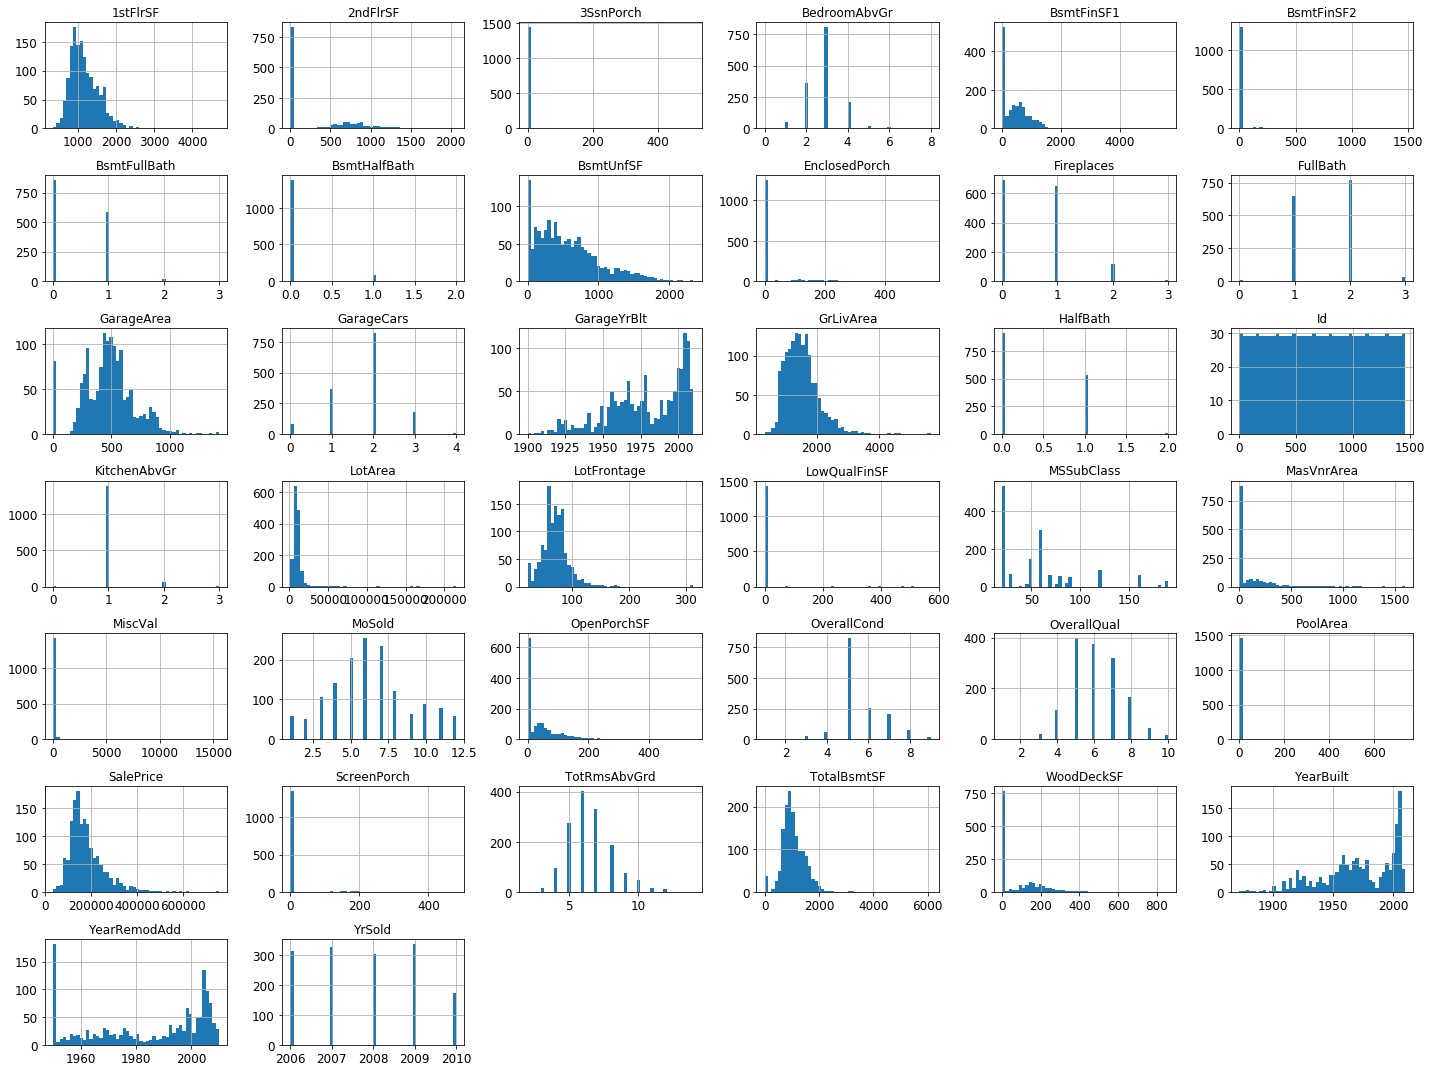

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [88]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

Saving figure scatter_matrix_plot


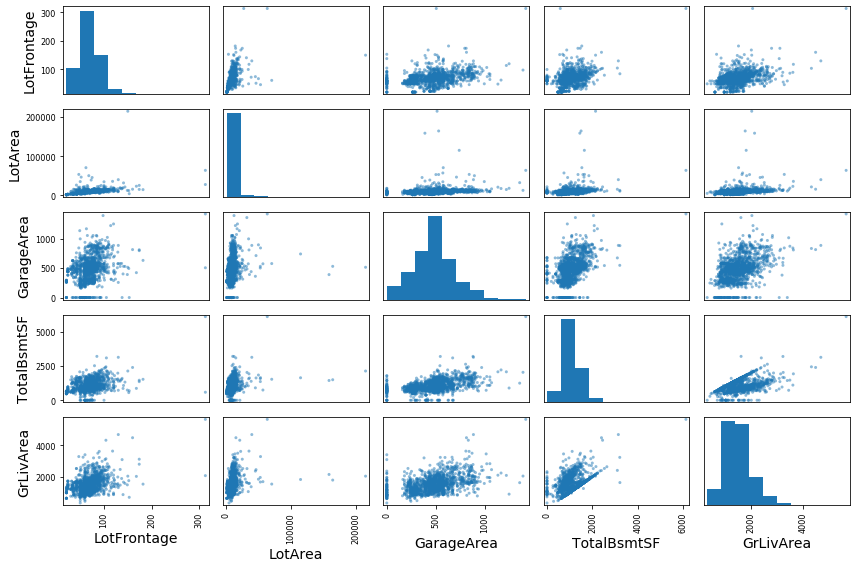

In [89]:
#scatter matrix for continuous value features
from pandas.plotting import scatter_matrix

cont_features = ['LotFrontage', 'LotArea','GarageArea', 'TotalBsmtSF', 'GrLivArea']

scatter_matrix(housing[cont_features], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [90]:
#Correlation Report
housing.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [91]:
def plot_top_10_linear_corr_features():
    #top 5 df
    top_10_linear_features = housing[abs(housing.corr()['SalePrice']).sort_values(ascending=False).index.values[0:10]]

    #plot and save
    scatter_matrix(top_10_linear_features, figsize=(20, 15))
    save_fig("top_10_linear_features")

    return top_10_linear_features

top_10_linear_features = plot_top_10_linear_corr_features()

Saving figure top_10_linear_features


## Focusing on a subset of the top 10 features

### Specifically because I'm trying to find a generalized sale price based on a linear model

In [ ]:
top_10_linear_features.info()

In [ ]:
#Adding ID column to the new focussed set of features
temp_feature_list = top_10_linear_features.columns.to_list()
temp_feature_list.append('Id')

#Creating a trimmed housing dataset (subset)
housing = housing[temp_feature_list]

# #Re-arranging housing df to keep Id column first and SalePrice (target) last (I like to see my dataset this way. No other reason)
housing = housing[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','SalePrice']]


In [ ]:
housing = housing[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','SalePrice']]
housing.head()

In [ ]:
temp_feature_list

In [ ]:
##Re-check to see if there are any missing features in our dataset
missing_value_percentage = calculate_missing_value_percentage(housing)
missing_value_percentage.head()

In [ ]:
housing.describe()

In [ ]:
#both '1stFlrSF' and 'GrLivArea' distributions have fat tails. Takign the log of these #to normalize them
def normalize_these_columns(df, col_list):
    for col in col_list:
        df[col] = df[col].apply(lambda x:np.log(x))

    return df

col_list = ['1stFlrSF', 'GrLivArea' ]

housing = normalize_these_columns(housing, col_list)


In [ ]:
#Overall quality seems to be an important indicator of sale price. 
# To ensure training is done with sampling bias in mind, let's do stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["OverallQual"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_train_set

In [ ]:
strat_train_set.plot(kind="scatter", x="GrLivArea", y="SalePrice",
             alpha=0.1)
save_fig("liv_area_vs_sale_price_scatterplot")

## Prep data for ML algorithms

In [ ]:
housing = strat_train_set.drop("SalePrice", axis=1) # drop target label for training set
housing_labels = strat_train_set["SalePrice"].copy()

In [ ]:
#Although in this case our features don't have NaNs, what if they did?
# We will use a median value based imputer in this case (usually will depend on which feature value is missing and its use/significance)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(housing)

print*"Imputer Stats and startegy : "
print(imputer_statistics_)
print(imputer.startegy)

X = imputer.transform(housing)

In [ ]:
### TAKE FLOAT Values

In [ ]:
housing.astype('float')

In [ ]:
housing["GrLivArea"].hist(bins=50)

In [ ]:
housing["GrLivArea_cat"] = pd.cut(housing["GrLivArea"],
                               bins=[0., 6.8, 7.1, 7.4, 7.7, np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["GrLivArea"].hist(bins=50)

In [ ]:
housing["GrLivArea"].hist(bins=50)